In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
sns.set(style='darkgrid')

In [15]:
import os
directory_path = 'F:\sales prediction'
files_in_directory = os.listdir(directory_path)
print(files_in_directory)

['Advertising.csv']


In [16]:
directory_path = 'F:\sales prediction'
files_in_directory = os.listdir(directory_path)
csv_file = [file for file in files_in_directory if file.endswith('.csv')][0]
file_path = os.path.join(directory_path, csv_file)
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [17]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [18]:
df_cleaned = df.dropna()

In [19]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_filled = df.copy()
df_filled[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [20]:
import plotly.express as px
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [21]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [22]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

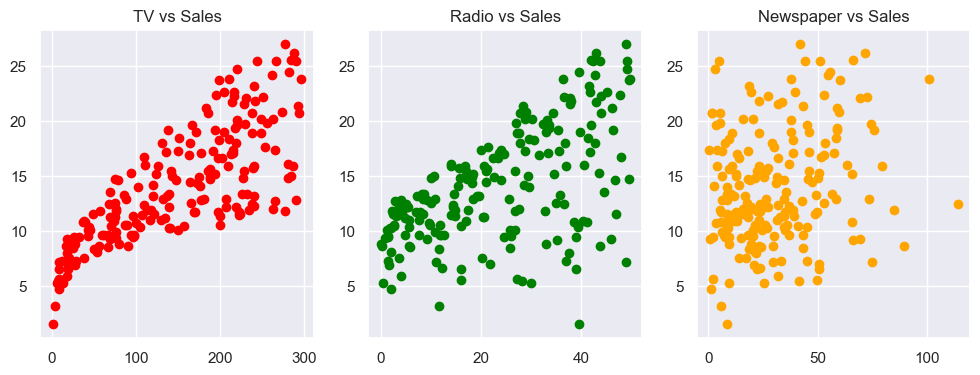

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'], color='red')
plt.title('TV vs Sales')
plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'], color='green')
plt.title('Radio vs Sales')
plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'], color='orange')
plt.title('Newspaper vs Sales')
plt.show()

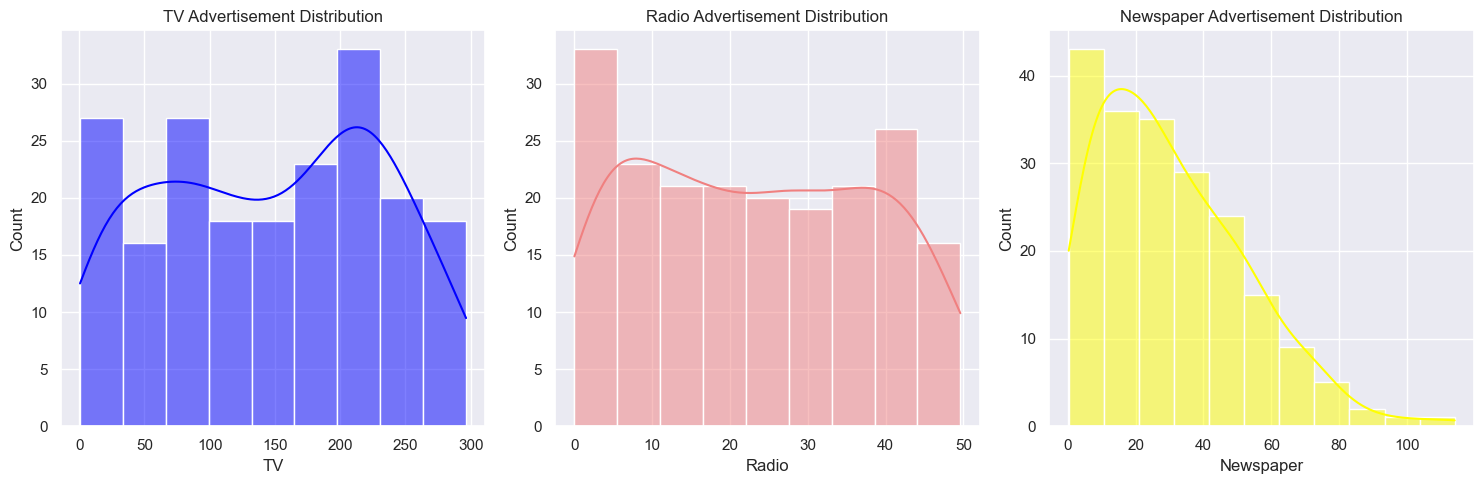

In [40]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['TV'], kde=True, color='blue')
plt.title('TV Advertisement Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], kde=True, color='lightcoral')
plt.title('Radio Advertisement Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], kde=True, color='yellow')
plt.title('Newspaper Advertisement Distribution')
plt.tight_layout()
plt.show()

In [29]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

In [33]:
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression:")
print(f'Mean Squared Error: {linear_mse}')
print(f'R-squared: {linear_r2}')

Linear Regression:
Mean Squared Error: 3.1740973539761046
R-squared: 0.899438024100912


In [34]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [35]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("\nRandom Forest Regression:")
print(f'Mean Squared Error: {rf_mse}')
print(f'R-squared: {rf_r2}')


Random Forest Regression:
Mean Squared Error: 0.5130361250000017
R-squared: 0.9837459533580519


In [36]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [37]:
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print("\nGradient Boosting Regression:")
print(f'Mean Squared Error: {gb_mse}')
print(f'R-squared: {gb_r2}')


Gradient Boosting Regression:
Mean Squared Error: 0.5116764039591063
R-squared: 0.9837890321358256


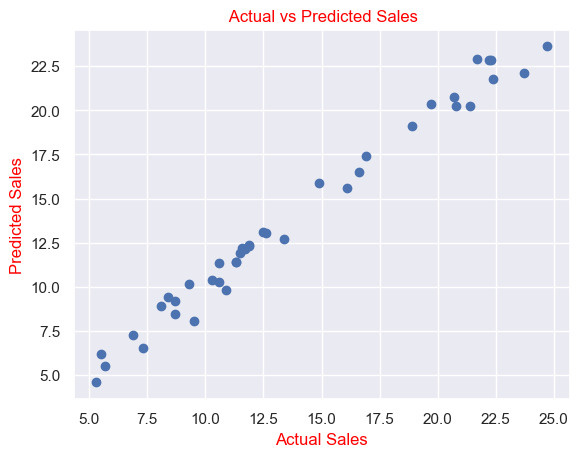

In [39]:
plt.scatter(y_test, gb_pred)
plt.xlabel('Actual Sales',color='red')
plt.ylabel('Predicted Sales',color='red')
plt.title(' Actual vs Predicted Sales',color='red')
plt.show()

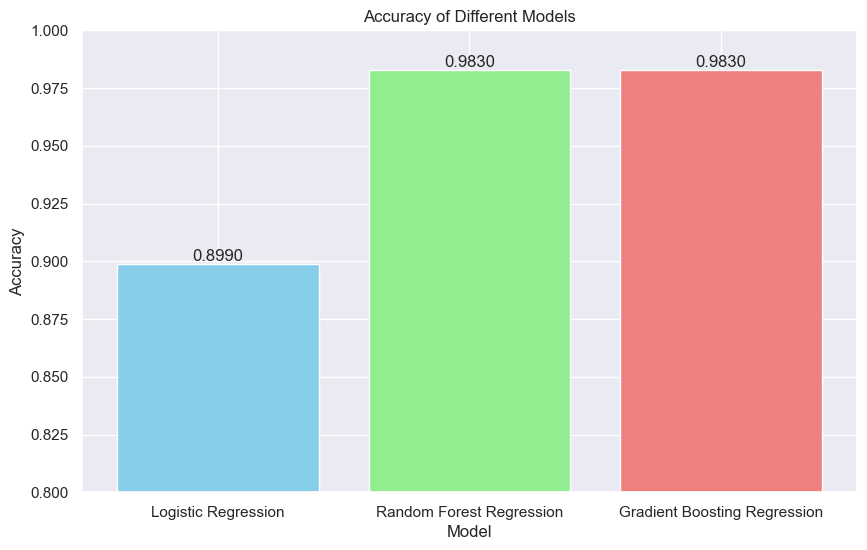

In [44]:
models = ['Logistic Regression', 'Random Forest Regression', 'Gradient Boosting Regression']
accuracy = [0.899, 0.983 , 0.983 ] 

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['skyblue', 'lightgreen', 'lightcoral', 'violet'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.80, 1)
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.001, f'{acc:.4f}', ha = 'center')

plt.show()